In [44]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output file in csv format
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [45]:
# Create lists for holding lat_lngs and cities values
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [46]:
# OpenWeatherMap API key
api_key = api_keys.api_key

# Create url for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create lists for storing values
latitude =[]
temperature =[]
windspeed =[]
cloudiness =[]
humidity =[]

#Create a loop in order to request information for each city
c = 1
for city in cities:
    query_url = url + "&q=" + city
    response = requests.get(query_url).json()
    
    # Show a status message
    print(f'Information for city {c}: {city}')
    c = c + 1
    
    # Append lists with information
    try:  
        latitude.append(response['coord']['lat'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        windspeed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        
    # Show an error message for certain cities, if information about them wasn't pulled from openweather.
    except:
        print(f'{city} is not found. Error. Skipping.')

# Count and display a total number of valid cities.
print(f'{len(latitude)} valid cities have been found.')

Information for city 1: mataura
Information for city 2: faanui
Information for city 3: punta arenas
Information for city 4: guerrero negro
Information for city 5: airai
Information for city 6: husavik
Information for city 7: esperance
Information for city 8: naze
Information for city 9: kahului
Information for city 10: la asuncion
Information for city 11: dikson
Information for city 12: marsh harbour
Information for city 13: timra
Information for city 14: rikitea
Information for city 15: skibbereen
Information for city 16: thompson
Information for city 17: upernavik
Information for city 18: lorengau
Information for city 19: hithadhoo
Information for city 20: cape town
Information for city 21: sagaing
Information for city 22: kapaa
Information for city 23: avarua
Information for city 24: damghan
Information for city 25: qaanaaq
Information for city 26: hermanus
Information for city 27: taolanaro
taolanaro is not found. Error. Skipping.
Information for city 28: bredasdorp
Information for

Information for city 209: karpogory
Information for city 210: port hedland
Information for city 211: kuytun
Information for city 212: were ilu
Information for city 213: basirpur
Information for city 214: buchanan
Information for city 215: rawannawi
rawannawi is not found. Error. Skipping.
Information for city 216: kloulklubed
Information for city 217: preobrazheniye
Information for city 218: saryozek
Information for city 219: broken hill
Information for city 220: kununurra
Information for city 221: port blair
Information for city 222: sibu
Information for city 223: igarka
Information for city 224: samana
Information for city 225: pallasovka
Information for city 226: namibe
Information for city 227: bubaque
Information for city 228: tateyama
Information for city 229: vestmanna
Information for city 230: puerto carreno
Information for city 231: kodiak
Information for city 232: tynda
Information for city 233: lasa
Information for city 234: angoche
Information for city 235: alofi
Informatio

Information for city 419: galesong
Information for city 420: ternate
Information for city 421: sterling
Information for city 422: minab
Information for city 423: cayenne
Information for city 424: tshane
Information for city 425: tigil
Information for city 426: thinadhoo
Information for city 427: quchan
Information for city 428: neijiang
Information for city 429: trowbridge
Information for city 430: bolshiye uki
bolshiye uki is not found. Error. Skipping.
Information for city 431: san quintin
Information for city 432: zhongxing
Information for city 433: savona
Information for city 434: sao raimundo nonato
sao raimundo nonato is not found. Error. Skipping.
Information for city 435: grand-lahou
Information for city 436: campbell river
Information for city 437: norman wells
Information for city 438: uyemskiy
Information for city 439: diglur
Information for city 440: mount isa
Information for city 441: biltine
Information for city 442: harnosand
Information for city 443: havre-saint-pierre


In [47]:
# Create lists for holding lat_lngs and city values
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

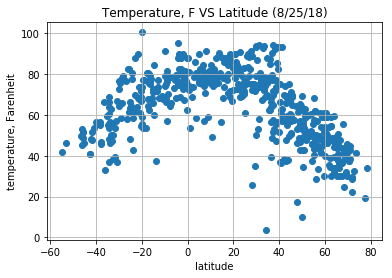

In [48]:
# Create a scatter plot temperature, F VS latitude
plt.scatter(latitude,temperature)
plt.grid(True)
plt.xlabel("latitude")
plt.ylabel("temperature, Farenheit")
plt.title("Temperature, F VS Latitude (8/25/18)")
plt.savefig("Temperature_latitude.png")
plt.show()

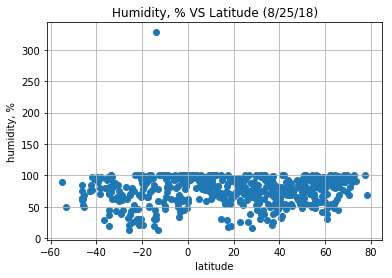

In [49]:
# Create a scatter plot humidity, % VS latitude
plt.scatter(latitude,humidity)
plt.grid(True)
plt.xlabel("latitude")
plt.ylabel("humidity, %")
plt.title("Humidity, % VS Latitude (8/25/18)")
plt.savefig("humidity_latitude.png")
plt.show()

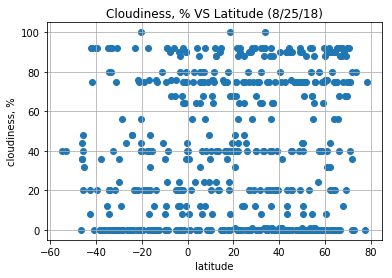

In [50]:
# Create a scatter plot cloudiness, % VS latitude
plt.scatter(latitude,cloudiness)
plt.grid(True)
plt.xlabel("latitude")
plt.ylabel("cloudiness, %")
plt.title("Cloudiness, % VS Latitude (8/25/18)")
plt.savefig("Cloudiness_latitude.png")
plt.show()           

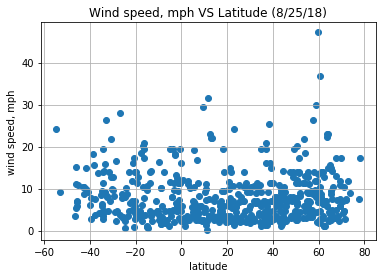

In [51]:
# Create a scatter plot wind speed, mph VS latitude
plt.scatter(latitude,windspeed)
plt.grid(True)
plt.xlabel("latitude")
plt.ylabel("wind speed, mph")
plt.title("Wind speed, mph VS Latitude (8/25/18)")
plt.savefig("Windspeed_latitude.png")
plt.show()           